In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batting_data=pd.read_csv("batting.csv")

In [3]:
batting_data

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


In [4]:
a=batting_data.describe()
numeric_columns=a.columns
a

,MatchID,InningsNo,MatchPlayingOrder,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,WicketNo,AgainstFast,AgainstSpin
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,911.000000,1628.000000,1628.000000
mean,37.608108,1.500000,6.000000,14.159705,10.571253,4.093980,3.921376,0.627150,0.035627,1.238943,0.652334,4.472009,6.824324,3.702703
std,21.547791,0.500154,3.163249,20.275401,13.142609,4.778989,5.697342,1.153994,0.201307,2.058166,1.272667,2.863763,8.534458,5.950012
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,19.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,37.500000,1.500000,6.000000,5.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000
75%,56.000000,2.000000,9.000000,22.000000,16.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,6.000000,11.000000,5.000000
max,76.000000,2.000000,11.000000,140.000000,70.000000,28.000000,32.000000,10.000000,2.000000,13.000000,10.000000,11.000000,57.000000,30.000000


<AxesSubplot:>

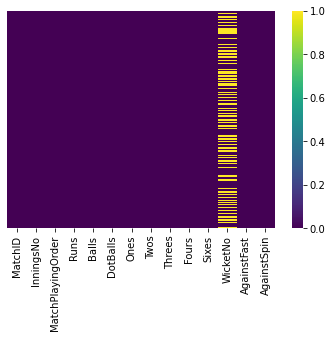

In [5]:
sns.heatmap(batting_data[numeric_columns].isna(),yticklabels=False,cmap='viridis')

In [6]:
batting_data.isna().sum()

MatchID                0
InningsNo              0
Team                   0
PlayerName             0
MatchPlayingOrder      0
BowlerName           716
OutDesc              452
Runs                   0
Balls                  0
DotBalls               0
Ones                   0
Twos                   0
Threes                 0
Fours                  0
Sixes                  0
StrikeRate             0
WicketNo             717
AgainstFast            0
AgainstSpin            0
dtype: int64

<AxesSubplot:xlabel='PlayerName', ylabel='count'>

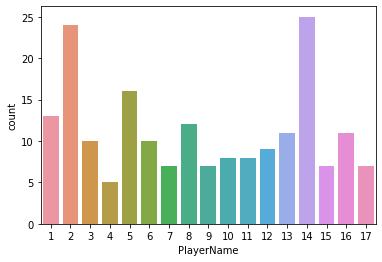

In [7]:
sns.countplot(x=batting_data.PlayerName.value_counts(),data=batting_data)

In [8]:
player_stats=batting_data[['PlayerName','Runs','Balls','DotBalls','Ones','Twos','Threes','Fours','Sixes','AgainstFast','AgainstSpin']].groupby('PlayerName').sum().sort_values("Runs",ascending=False)

In [9]:
highest_score=batting_data['Runs'].argmax()
batting_data.iloc[highest_score]

MatchID                           66
InningsNo                          1
Team                             LSG
PlayerName           Quinton De Kock
MatchPlayingOrder                  1
BowlerName                       NaN
OutDesc                      not out
Runs                             140
Balls                             70
DotBalls                          15
Ones                              30
Twos                               5
Threes                             0
Fours                             10
Sixes                             10
StrikeRate                    200.00
WicketNo                         NaN
AgainstFast                       42
AgainstSpin                       28
Name: 1430, dtype: object

## Individual Player Stats

In [10]:
player_stats

,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,AgainstFast,AgainstSpin
PlayerName,,,,,,,,,,
Jos Buttler,863,579,230,185,33,2,83,45,416,158
K L Rahul,616,455,151,203,25,1,45,30,301,153
Quinton De Kock,508,341,115,131,24,1,47,23,223,117
Hardik Pandya,487,371,119,164,26,1,49,12,205,165
Shubman Gill,483,365,117,159,27,0,51,11,218,144
...,...,...,...,...,...,...,...,...,...,...
Prashant Solanki,0,0,0,0,0,0,0,0,0,0
Ravi Bishnoi,0,1,1,0,0,0,0,0,1,0
Riley Meredith,0,1,1,0,0,0,0,0,1,0


In [11]:
player_team=batting_data[['PlayerName','Team']].groupby('PlayerName').sample()
player_team.set_index("PlayerName",inplace=True)
player_team
player_team.loc['Jos Buttler']

Team    RR
Name: Jos Buttler, dtype: object

In [12]:
player_stats=player_stats.merge(player_team,on='PlayerName')
player_stats

,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,AgainstFast,AgainstSpin,Team
PlayerName,,,,,,,,,,,
Jos Buttler,863,579,230,185,33,2,83,45,416,158,RR
K L Rahul,616,455,151,203,25,1,45,30,301,153,LSG
Quinton De Kock,508,341,115,131,24,1,47,23,223,117,LSG
Hardik Pandya,487,371,119,164,26,1,49,12,205,165,GT
Shubman Gill,483,365,117,159,27,0,51,11,218,144,GT
...,...,...,...,...,...,...,...,...,...,...,...
Prashant Solanki,0,0,0,0,0,0,0,0,0,0,CSK
Ravi Bishnoi,0,1,1,0,0,0,0,0,1,0,LSG
Riley Meredith,0,1,1,0,0,0,0,0,1,0,MI


## Number of Players from each team in top 10scoring list

<AxesSubplot:xlabel='Team', ylabel='count'>

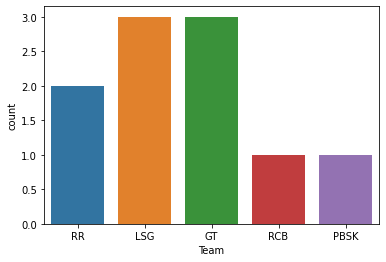

In [13]:
sns.countplot(x=player_stats.head(10).Team)

In [14]:
player_stats.loc['Virat Kohli']


Runs           341
Balls          294
DotBalls       115
Ones           117
Twos            18
Threes           4
Fours           32
Sixes            8
AgainstFast    195
AgainstSpin     99
Team           RCB
Name: Virat Kohli, dtype: object

## Team Stats

In [15]:
team_stats=player_stats.groupby('Team').sum().sort_values('Runs',ascending=False)
team_stats

,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,AgainstFast,AgainstSpin
Team,,,,,,,,,,
RR,2807,2036,792,736,115,5,249,137,1361,664
GT,2517,1902,655,795,121,2,250,79,1199,696
RCB,2454,1875,741,680,116,14,222,102,1150,718
LSG,2405,1761,623,712,118,5,188,115,1155,603
DC,2218,1589,614,574,82,8,205,106,985,597
PBSK,2193,1620,666,560,79,5,200,110,1053,558
CSK,2165,1652,653,617,91,4,183,103,1116,528
KKR,2109,1572,669,509,98,6,177,113,1052,513
MI,2100,1633,665,587,103,5,173,100,1026,599


In [16]:
dot_ball_percentage=(team_stats.DotBalls/team_stats.Balls)*100
dot_ball_percentage.sort_values()

Team
GT      34.437434
LSG     35.377626
SRH     37.388535
DC      38.640654
RR      38.899804
RCB     39.520000
CSK     39.527845
MI      40.722596
PBSK    41.111111
KKR     42.557252
dtype: float64

In [20]:
from pandas_profiling import ProfileReport

In [18]:
# profile = ProfileReport(batting_data, title="Pandas Profiling Report")


# Performance Analysis

In [53]:
opening_Batsman_score=batting_data.groupby(['Team','MatchPlayingOrder']).sum().sort_values('Runs',ascending=False)
opening_Batsman_score.reset_index(inplace=True)
f=opening_Batsman_score[opening_Batsman_score['MatchPlayingOrder']==1].sort_values('Team')
s=opening_Batsman_score[opening_Batsman_score['MatchPlayingOrder']==2].sort_values('Team')
opening_Batsman_score=pd.DataFrame(f.values+s.values,columns=opening_Batsman_score.columns).sort_values('Runs',ascending=False)
opening_Batsman_score['Team'] = opening_Batsman_score['Team'].apply(lambda x: x[0:int(len(x)/2)])
opening_Batsman_score.drop(columns=['MatchPlayingOrder','MatchID','InningsNo','WicketNo'],inplace=True)
opening_Batsman_score.set_index('Team')

,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,AgainstFast,AgainstSpin
Team,,,,,,,,,,
RR,1190,849,352,275,42,3,119,57,597,243
LSG,1123,792,263,333,49,2,92,53,520,270
GT,870,682,252,272,36,0,103,19,434,245
RCB,821,681,287,240,41,5,82,26,444,237
CSK,820,604,229,232,28,4,72,38,443,157
DC,697,468,187,141,19,6,95,20,332,133
PBSK,693,526,206,192,30,1,72,25,385,137
MI,686,571,256,188,28,2,73,24,402,166
SRH,649,550,235,198,30,1,64,22,372,178


So we can see that the team whose opening batsmans performed well have performed well in the tournament